In [1]:
import pandas as pd
import numpy as np
import os
from ete3 import NCBITaxa
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
DATA_PATH = '../data'
FILENAME = 'api-output-collapsed-with-categories.csv'

In [3]:
metadata_df = pd.read_csv(os.path.join(DATA_PATH, FILENAME), header=1)


In [4]:
metadata_df

,accession,assay name,study assay technology type,organism,organism.term accession number,organism.term source ref,material type,material type.term accession number,material type.term source ref,category
0,OSD-1,OSD-1_transcription-profiling_dna-microarray,DNA microarray,Drosophila melanogaster,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,whole organism,http://purl.obolibrary.org/obo/UBERON_0000468,EFO,GeneLab Processed Microarray Data Files
1,OSD-3,E-GEOD-23880_GeneChip_assay,DNA microarray,Drosophila melanogaster,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,NaN,NaN,NaN,GeneLab Processed Microarray Data Files
2,OSD-4,OSD-4_transcription-profiling_dna-microarray_a...,DNA microarray,Mus musculus,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,thymus,http://purl.obolibrary.org/obo/UBERON_0002370,EFO,GeneLab Processed Microarray Data Files
3,OSD-6,e-geod-6299_transcription_profiling_DNA_microa...,DNA microarray,Rattus norvegicus,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,NaN,NaN,NaN,GeneLab Processed Microarray Data Files
4,OSD-7,E-MTAB-1264_GeneChip_assay,DNA microarray,Arabidopsis thaliana,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,NaN,NaN,NaN,GeneLab Processed Microarray Data Files
...,...,...,...,...,...,...,...,...,...,...
304,OSD-613,OSD-613_transcription-profiling_single-cell-rn...,single-cell RNA sequencing,Mus musculus,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,Left cerebral hemisphere,http://purl.org/sig/ont/fma/fma61819,FMA,GeneLab Processed snATACseq Data Files|GeneLab...
305,OSD-658,OSD-658_transcription-profiling_rna-sequencing...,RNA Sequencing (RNA-Seq),Arabidopsis thaliana,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,Whole Organism,http://purl.obolibrary.org/obo/NCIT_C13413,NCIT,GeneLab Processed RNA-Seq Files
306,OSD-665,OSD-665_transcription-profiling_rna-sequencing...,RNA Sequencing (RNA-Seq),Mus musculus,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,Right extensor digitorum longus,http://purl.org/sig/ont/fma/fma22548,FMA,GeneLab Processed RNA-Seq Files
307,OSD-666,OSD-666_transcription-profiling_rna-sequencing...,RNA Sequencing (RNA-Seq),Mus musculus,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,Right quadriceps femoris,http://purl.org/sig/ont/fma/fma22444,FMA,GeneLab Processed RNA-Seq Files


In [5]:
metadata_df.accession.unique().shape

(211,)

In [6]:
processed_file_count = 0
for index, row in metadata_df.iterrows():
    if 'Processed' in row['category']:
        processed_file_count += 1
print('Total Processed files = ', processed_file_count)

Total Processed files =  309


# Count of study assay technology type

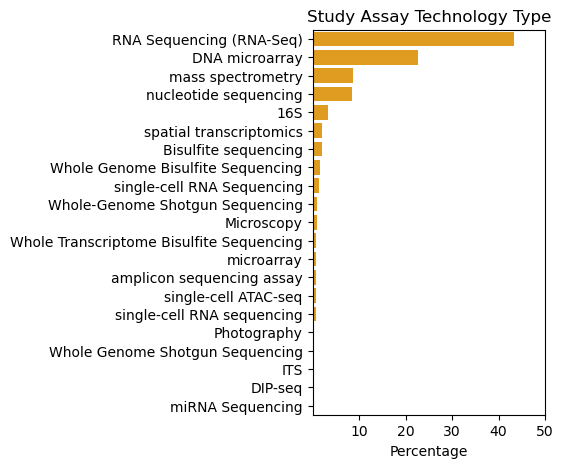

In [7]:
counts = metadata_df['study assay technology type'].value_counts()

total_samples = len(metadata_df)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

fig = plt.figure(figsize=(3, 5))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Study Assay Technology Type')
plt.xlabel('Percentage')
plt.ylabel('')
plt.xticks(range(10, 51, 10))

plt.show()

fig.savefig('../data/figures/assay_type.svg', format="svg", bbox_inches='tight')


In [8]:
metadata_df['study assay technology type'].unique()

array(['DNA microarray', 'amplicon sequencing assay',
       'RNA Sequencing (RNA-Seq)', 'mass spectrometry',
       'Whole Genome Bisulfite Sequencing', 'Microscopy',
       'Whole Transcriptome Bisulfite Sequencing',
       'nucleotide sequencing', 'Photography', 'microarray',
       'Bisulfite sequencing', 'Whole-Genome Shotgun Sequencing',
       'Whole Genome Shotgun Sequencing', '16S', 'ITS',
       'spatial transcriptomics', 'DIP-seq', 'single-cell RNA Sequencing',
       'miRNA Sequencing', 'single-cell ATAC-seq',
       'single-cell RNA sequencing'], dtype=object)

In [9]:
spoke_relevant_assays = ['RNA Sequencing (RNA-Seq)', 'DNA microarray', 'mass spectrometry', 'nucleotide sequencing', '16S']
metadata_df[metadata_df['study assay technology type'].isin(spoke_relevant_assays)].accession.unique().shape


(194,)

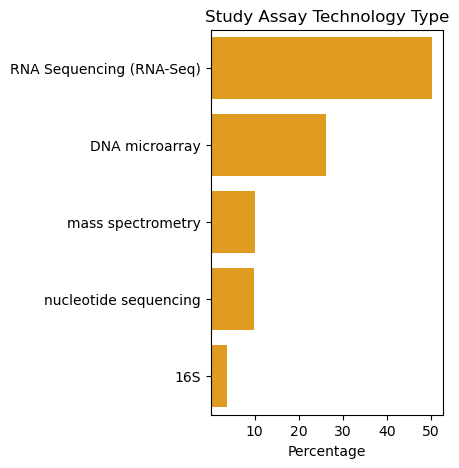

In [10]:
spoke_relevant_assays = ['RNA Sequencing (RNA-Seq)', 'DNA microarray', 'mass spectrometry', 'nucleotide sequencing', '16S']
metadata_df_ = metadata_df[metadata_df['study assay technology type'].isin(spoke_relevant_assays)]

counts = metadata_df_['study assay technology type'].value_counts()

total_samples = len(metadata_df_)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

fig = plt.figure(figsize=(3, 5))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Study Assay Technology Type')
plt.xlabel('Percentage')
plt.ylabel('')
plt.xticks(range(10, 51, 10))

plt.show()



# Organism counts

## Get Kingdom and Superkingdom of Organism used in the assay

In [11]:
ncbi = NCBITaxa()
lineage_superkingdom = [None]*metadata_df.shape[0]
lineage_kingdom = [None]*metadata_df.shape[0]
for index, row in metadata_df.iterrows():
    try:
        tax_id = row['organism.term accession number'].split('/')[-1]
        lineage = ncbi.get_lineage(tax_id)
        lineage_names = ncbi.get_taxid_translator(lineage)
        for item in lineage_names:
            rank = list(ncbi.get_rank([item]).values())[0]
            if rank == 'superkingdom':
                lineage_superkingdom[index] = lineage_names[item]
            if rank == 'kingdom':
                lineage_kingdom[index] = lineage_names[item]
    except:
        continue
metadata_df.loc[:, 'lineage_superkingdom'] = lineage_superkingdom
metadata_df.loc[:, 'lineage_kingdom'] = lineage_kingdom


## i. Count of Organism at Superkingdom level

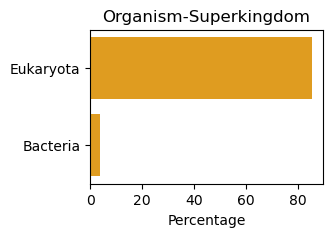

In [13]:
counts = metadata_df['lineage_superkingdom'].value_counts()

total_samples = len(metadata_df)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

plt.figure(figsize=(3, 2))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Organism-Superkingdom')
plt.xlabel('Percentage')
plt.ylabel('')
# plt.xticks(range(10, 61, 10))

plt.show()


## ii. Count of Organism at Kingdom level

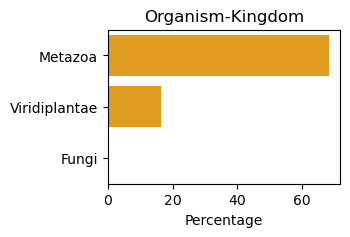

In [14]:
counts = metadata_df['lineage_kingdom'].value_counts()

total_samples = len(metadata_df)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

plt.figure(figsize=(3, 2))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Organism-Kingdom')
plt.xlabel('Percentage')
plt.ylabel('')
# plt.xticks(range(10, 61, 10))

plt.show()


## iii. Count of Organism at granular level

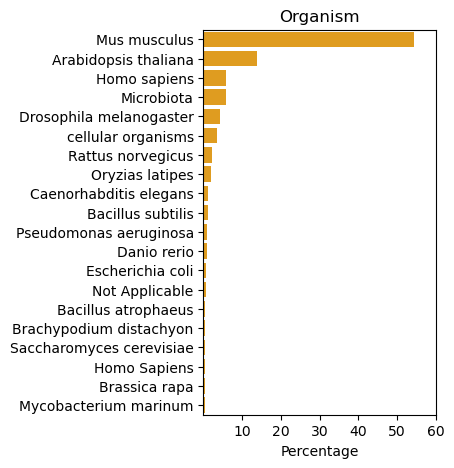

In [86]:
counts = metadata_df['organism'].value_counts()

total_samples = len(metadata_df)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

fig = plt.figure(figsize=(3, 5))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Organism')
plt.xlabel('Percentage')
plt.ylabel('')
plt.xticks(range(10, 61, 10))

plt.show()

fig.savefig('../data/figures/organism_type.svg', format="svg", bbox_inches='tight')


In [104]:
metadata_df_.accession.unique().shape

(194,)

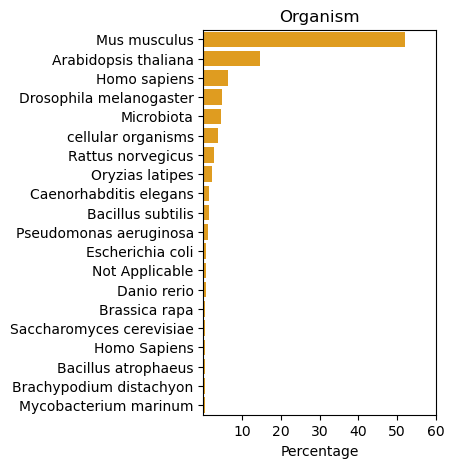

In [101]:
counts = metadata_df_['organism'].value_counts()

total_samples = len(metadata_df_)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

fig = plt.figure(figsize=(3, 5))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Organism')
plt.xlabel('Percentage')
plt.ylabel('')
plt.xticks(range(10, 61, 10))

plt.show()

fig.savefig('../data/figures/organism_type_after_assay_filtering.svg', format="svg", bbox_inches='tight')


In [87]:
spoke_relevant_assays = ['RNA Sequencing (RNA-Seq)', 'DNA microarray', 'mass spectrometry', 'nucleotide sequencing', '16S']
organism_to_exclude = ['Viridiplantae', 'Fungi']
metadata_df_ = metadata_df[metadata_df['study assay technology type'].isin(spoke_relevant_assays)]
metadata_df_without_plants_fungi = metadata_df_[~metadata_df_['lineage_kingdom'].isin(organism_to_exclude)]
metadata_df_without_plants_fungi = metadata_df_without_plants_fungi[metadata_df_without_plants_fungi.organism != 'Not Applicable']
metadata_df_without_plants_fungi.dropna(subset=['lineage_kingdom'], inplace=True)
metadata_df_without_plants_fungi.dropna(subset=['organism']).accession.unique().shape


(128,)

In [68]:
metadata_df_without_plants_fungi.organism.unique()

array(['Drosophila melanogaster', 'Mus musculus', 'Rattus norvegicus',
       'Caenorhabditis elegans', 'Oryzias latipes', 'Homo sapiens',
       'Danio rerio', 'Homo Sapiens'], dtype=object)

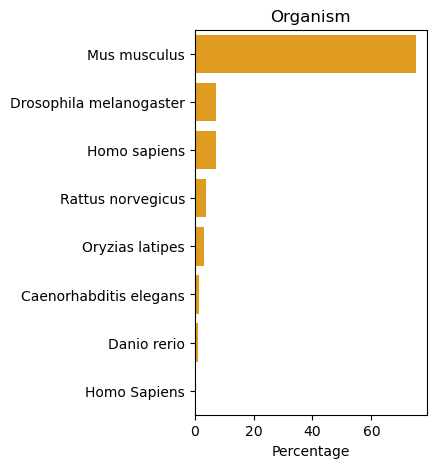

In [89]:
counts = metadata_df_without_plants_fungi['organism'].value_counts()

total_samples = len(metadata_df_without_plants_fungi)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

fig = plt.figure(figsize=(3, 5))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Organism')
plt.xlabel('Percentage')
plt.ylabel('')
# plt.xticks(range(10, 61, 10))

plt.show()

fig.savefig('../data/figures/organism_type_after_selection.svg', format="svg", bbox_inches='tight')

# Count of Material type used for the study

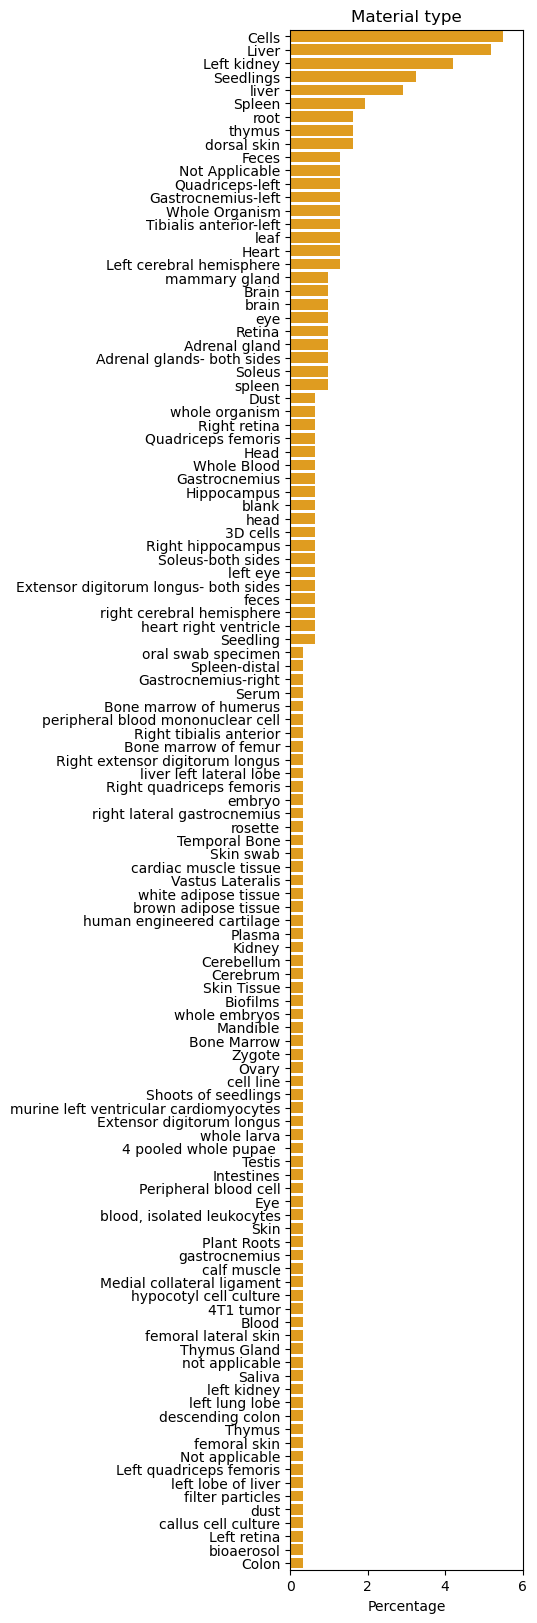

In [91]:
counts = metadata_df['material type'].value_counts()

total_samples = len(metadata_df)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

fig = plt.figure(figsize=(3, 20))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Material type')
plt.xlabel('Percentage')
plt.ylabel('')
plt.xticks(range(0, 7, 2))

plt.show()

fig.savefig('../data/figures/material_type.svg', format="svg", bbox_inches='tight')


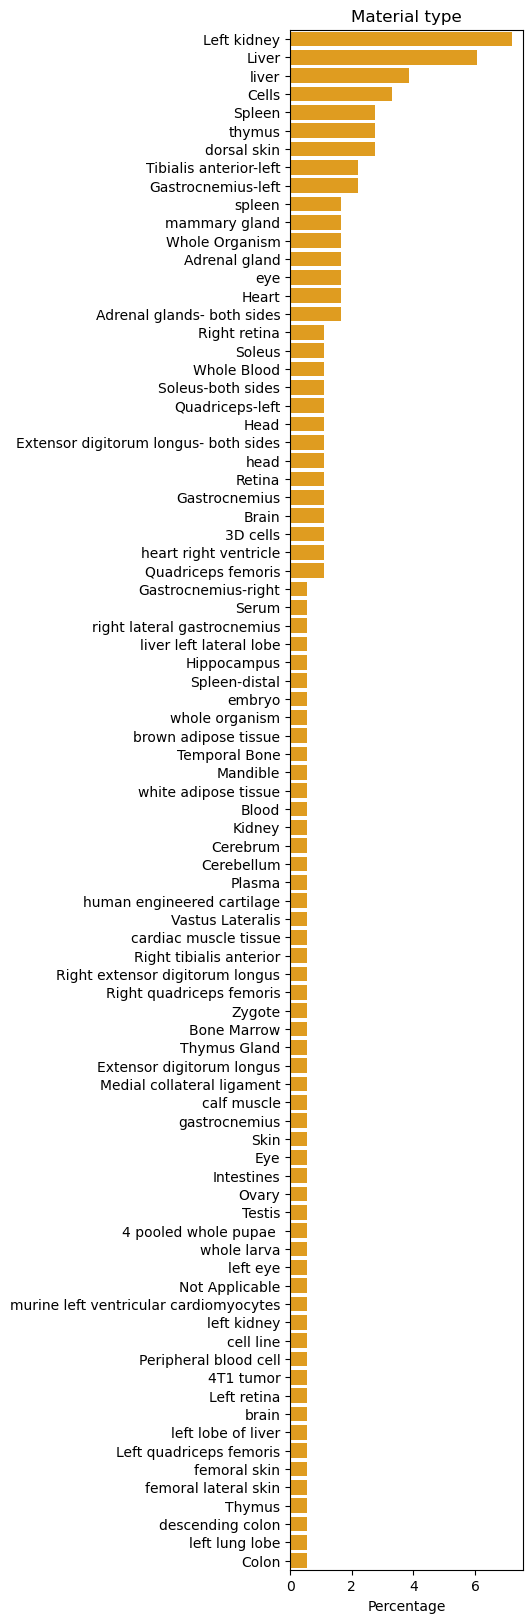

In [100]:
counts = metadata_df_without_plants_fungi['material type'].value_counts()

total_samples = len(metadata_df_without_plants_fungi)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

fig = plt.figure(figsize=(3, 20))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Material type')
plt.xlabel('Percentage')
plt.ylabel('')
plt.xticks(range(0, 7, 2))

plt.show()

fig.savefig('../data/figures/material_type_after_organism_filter.svg', format="svg", bbox_inches='tight')


In [93]:
metadata_df_without_plants_fungi_ = metadata_df_without_plants_fungi.dropna(subset=['material type.term accession number'])
metadata_df_without_plants_fungi_.loc[:,'material_type_id'] = metadata_df_without_plants_fungi_['material type.term accession number'].apply(lambda x:x.split('/')[-1].split('_')[0])


/var/folders/p1/h56gxdhs5vgb0ztp7h4z606h0000gn/T/ipykernel_63542/2881832407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_df_without_plants_fungi_.loc[:,'material_type_id'] = metadata_df_without_plants_fungi_['material type.term accession number'].apply(lambda x:x.split('/')[-1].split('_')[0])


In [96]:
metadata_df_without_plants_fungi_after_uberon_filter = metadata_df_without_plants_fungi_[(metadata_df_without_plants_fungi_.material_type_id.str.startswith('D')) | 
                                   (metadata_df_without_plants_fungi_.material_type_id == 'UBERON') |
                                 (metadata_df_without_plants_fungi_['material_type_id'].str.contains('fma'))|
                                 (metadata_df_without_plants_fungi_['material_type_id'].str.contains('EHDA')) |
                                 (metadata_df_without_plants_fungi_['material_type_id'].str.contains('owl'))]

metadata_df_without_plants_fungi_after_uberon_filter.accession.unique().shape


(85,)

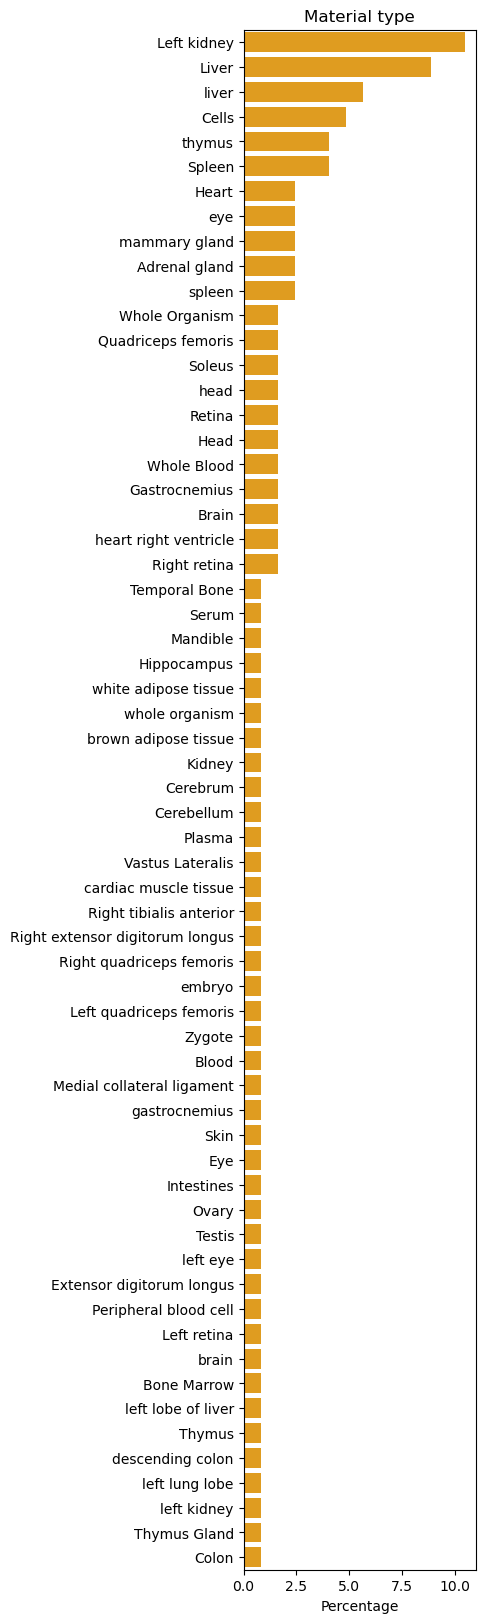

In [98]:
counts = metadata_df_without_plants_fungi_after_uberon_filter['material type'].value_counts()

total_samples = len(metadata_df_without_plants_fungi_after_uberon_filter)
percentage = (counts / total_samples) * 100

sorted_categories = percentage.index
sorted_percentages = percentage.values

fig = plt.figure(figsize=(3, 20))
sns.barplot(x=sorted_percentages, y=sorted_categories, color='orange', order=sorted_categories)

plt.title('Material type')
plt.xlabel('Percentage')
plt.ylabel('')
# plt.xticks(range(0, 7, 2))

plt.show()

fig.savefig('../data/figures/material_type_after_organism_and_uberon_filter.svg', format="svg", bbox_inches='tight')


In [52]:
metadata_df_without_plants_fungi_[metadata_df_without_plants_fungi_.material_type_id == 'MEO']

,accession,assay name,study assay technology type,organism,organism.term accession number,organism.term source ref,material type,material type.term accession number,material type.term source ref,category,lineage_superkingdom,lineage_kingdom,material_type_id
136,OSD-170,glds-170_metagenome_profiling_nucleotide_seque...,nucleotide sequencing,cellular organisms,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,bioaerosol,http://purl.jp/bio/11/meo/MEO_0000860,MEO,GeneLab Processed Diversity Amplicon Files,None,None,MEO


In [56]:
metadata_df_without_plants_fungi_[metadata_df_without_plants_fungi_['material type'] == 'Dust']

,accession,assay name,study assay technology type,organism,organism.term accession number,organism.term source ref,material type,material type.term accession number,material type.term source ref,category,lineage_superkingdom,lineage_kingdom,material_type_id
104,OSD-126,prjeb14961_metagenome_profiling_nucleotide_seq...,nucleotide sequencing,cellular organisms,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,Dust,http://purl.bioontology.org/ontology/MESH/D004391,MESH,GeneLab Processed Diversity Amplicon Files,None,None,D004391
143,OSD-200,dannemilleriss_metagenome_profiling_nucleotide...,nucleotide sequencing,cellular organisms,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,Dust,http://purl.bioontology.org/ontology/MESH/D004391,MESH,GeneLab Processed Diversity Amplicon Files,None,None,D004391


In [77]:
metadata_df_without_plants_fungi_[metadata_df_without_plants_fungi_['material_type_id'].str.contains('owl')]


,accession,assay name,study assay technology type,organism,organism.term accession number,organism.term source ref,material type,material type.term accession number,material type.term source ref,category,lineage_superkingdom,lineage_kingdom,material_type_id
100,OSD-123,e-mtab-3289_transcription_profiling_DNA_microa...,DNA microarray,Danio rerio,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,Whole Organism,http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus...,NCIT,GeneLab Processed Microarray Data Files,Eukaryota,Metazoa,Thesaurus.owlC13413
242,OSD-425,OSD-425_transcription-profiling_dna-microarray...,DNA microarray,Caenorhabditis elegans,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,Whole Organism,http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus...,NCIT,GeneLab Processed Microarray Data Files,Eukaryota,Metazoa,Thesaurus.owlC13413
252,OSD-455,OSD-455_transcription-profiling_dna-microarray...,DNA microarray,Mus musculus,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,Whole Blood,http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus...,NCIT,GeneLab Processed Microarray Data Files,Eukaryota,Metazoa,Thesaurus.owlC41067
260,OSD-457,OSD-457_transcription-profiling_rna-sequencing...,RNA Sequencing (RNA-Seq),Mus musculus,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,Kidney,http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus...,NCIT,GeneLab Processed RNA-Seq Files,Eukaryota,Metazoa,Thesaurus.owlC12415
287,OSD-540,OSD-540_transcription-profiling_rna-sequencing...,RNA Sequencing (RNA-Seq),Homo sapiens,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,Vastus Lateralis,http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus...,NCIT,GeneLab Processed RNA-Seq Files,Eukaryota,Metazoa,Thesaurus.owlC53073
288,OSD-542,OSD-542_transcription-profiling_dna-microarray...,DNA microarray,Homo sapiens,http://purl.bioontology.org/ontology/NCBITAXON...,NCBITAXON,Whole Blood,http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus...,NCIT,GeneLab Processed Microarray Data Files,Eukaryota,Metazoa,Thesaurus.owlC41067


In [74]:
metadata_df_without_plants_fungi_.material_type_id.unique()

array(['UBERON', 'fma305650', 'D008099', 'fmaFMA', 'D001921', 'D005123',
       'D007422', 'D010053', 'D013737', 'D012160', 'D002477', 'fma7205',
       'fma22534', 'fma22542', 'NCIT', 'Thesaurus.owlC13413', 'CLO',
       'fma86697', 'fma9604', 'D013154', 'fma58303', 'fma58302',
       'D006257', 'fma7196', 'D001853', 'fma22445', 'fma9607', 'fma7088',
       'EHDA', 'D013950', 'D001769', 'D015053', 'fma22428', 'fma50801',
       '', 'D006624', 'MA', 'fma22541', 'D044967', 'Thesaurus.owlC41067',
       'D013701', 'D008334', 'Thesaurus.owlC12415', 'D054022', 'D002531',
       'D010949', 'Thesaurus.owlC53073', 'fma22544', 'fma22548',
       'fma22444', 'D003106'], dtype=object)

In [58]:
metadata_df_without_plants_fungi_['material_type_id'].value_counts()


UBERON                 36
D002477                15
fma7205                13
D008099                11
                        5
fma7088                 3
D013154                 3
fma22542                3
fma9604                 3
Thesaurus.owlC13413     2
fma22541                2
fma7196                 2
D006257                 2
fma58302                2
Thesaurus.owlC41067     2
D004391                 2
fma22428                2
D012160                 2
Thesaurus.owlC53073     1
fma50801                1
fma22444                1
D006624                 1
fma22548                1
MA                      1
fma22544                1
D005243                 1
D008334                 1
D015053                 1
D002531                 1
OBI                     1
D044967                 1
D054022                 1
Thesaurus.owlC12415     1
D013701                 1
D010949                 1
fma22445                1
D001769                 1
CLO                     1
fmaFMA      